<a href="https://colab.research.google.com/github/sborah53/Machine-Learning-for-Physical-Sciences/blob/main/MLPS_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

True Spring Constant: 5.0 N/m

[Analytical Method]
Estimated k: 4.8840 N/m
Bias (Sensor drift): 0.1289 N

[Gradient Descent Method]
Estimated k: 4.8840 N/m
Bias (Sensor drift): 0.1289 N


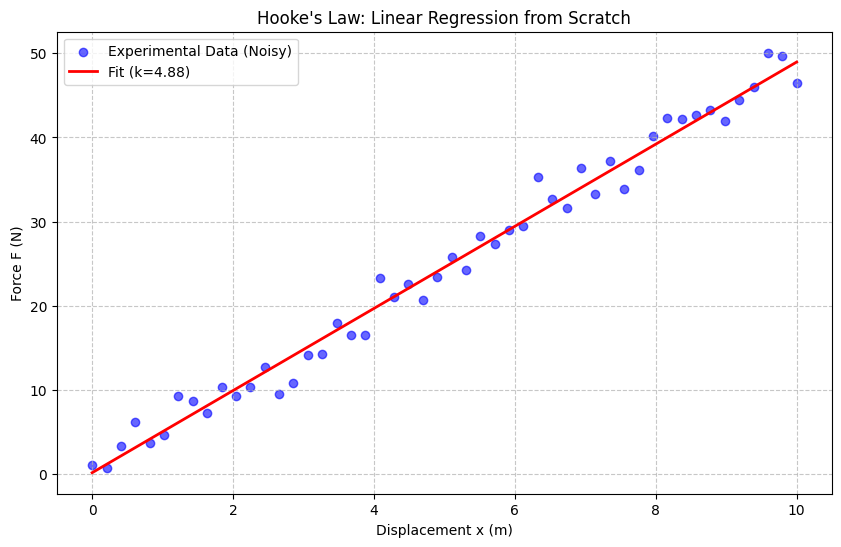

In [3]:
import numpy as np
import matplotlib.pyplot as plt

class LinearRegressionPhysics:
    """
    A linear regression implementation from scratch for physics data analysis.
    Supports both Analytical (Normal Equation) and Numerical (Gradient Descent) solvers.
    """

    def __init__(self, learning_rate=0.01, n_iterations=1000, method='analytical'):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.method = method
        self.weights = None
        self.bias = None
        self.history = []

    def fit(self, X, y):
        """
        Fit the model to the data.
        X: numpy array of shape (n_samples, n_features)
        y: numpy array of shape (n_samples,)
        """
        n_samples, n_features = X.shape

        if self.method == 'analytical':
            # Normal Equation: theta = (X^T * X)^-1 * X^T * y
            # We add a column of ones to X to handle the bias term automatically
            X_b = np.c_[np.ones((n_samples, 1)), X]

            # Linear Algebra derivation
            theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

            self.bias = theta[0]
            self.weights = theta[1:]

        elif self.method == 'gradient_descent':
            # Initialize parameters
            self.weights = np.zeros(n_features)
            self.bias = 0

            for _ in range(self.n_iterations):
                # Forward pass (Hypothesis)
                y_predicted = np.dot(X, self.weights) + self.bias

                # Compute Gradients
                # dL/dw = (2/N) * X^T * (y_pred - y)
                dw = (2 / n_samples) * np.dot(X.T, (y_predicted - y))
                # dL/db = (2/N) * sum(y_pred - y)
                db = (2 / n_samples) * np.sum(y_predicted - y)

                # Update parameters
                self.weights -= self.learning_rate * dw
                self.bias -= self.learning_rate * db

                # Store cost for history
                cost = np.mean((y - y_predicted)**2)
                self.history.append(cost)

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

def generate_hookes_law_data(k_true, n_points=50, noise_level=2.0):
    """
    Generates synthetic data for F = -kx + noise
    Note: We usually measure elongation (x) and Force (F).
    Here we treat x as feature and F as target.
    """
    np.random.seed(42)
    x = np.linspace(0, 10, n_points)
    # F = k*x (magnitude) + Gaussian noise
    F = k_true * x + np.random.normal(0, noise_level, n_points)
    return x.reshape(-1, 1), F

if __name__ == "__main__":
    # 1. Setup Physics Simulation
    k_constant = 5.0  # N/m
    print(f"True Spring Constant: {k_constant} N/m")

    X, y = generate_hookes_law_data(k_constant)

    # 2. Train Model (Analytical)
    model_ana = LinearRegressionPhysics(method='analytical')
    model_ana.fit(X, y)

    print(f"\n[Analytical Method]")
    print(f"Estimated k: {model_ana.weights[0]:.4f} N/m")
    print(f"Bias (Sensor drift): {model_ana.bias:.4f} N")

    # 3. Train Model (Gradient Descent)
    model_gd = LinearRegressionPhysics(method='gradient_descent', learning_rate=0.01, n_iterations=2000)
    model_gd.fit(X, y)

    print(f"\n[Gradient Descent Method]")
    print(f"Estimated k: {model_gd.weights[0]:.4f} N/m")
    print(f"Bias (Sensor drift): {model_gd.bias:.4f} N")

    # 4. Visualization
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue', label='Experimental Data (Noisy)', alpha=0.6)
    plt.plot(X, model_ana.predict(X), color='red', linewidth=2, label=f'Fit (k={model_ana.weights[0]:.2f})')
    plt.title("Hooke's Law: Linear Regression from Scratch")
    plt.xlabel("Displacement x (m)")
    plt.ylabel("Force F (N)")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)


In [4]:
from sklearn.linear_model import LinearRegression

# Scikit-learn expects X to be a 2D array (samples, features)
# Our generate_hookes_law_data function already returns X in (N, 1)

model_sk = LinearRegression()
model_sk.fit(X, y)

print(f"Slope (k): {model_sk.coef_[0]:.4f}")
print(f"Intercept: {model_sk.intercept_:.4f}")

Slope (k): 4.8840
Intercept: 0.1289
